# 随机森林
- 在 bagging 中，使用 决策树来进行大规模训练的就是随机森林
- 因为继承学习需要每一个子模型有更多的差异性
- sklearn 提供的 随机森林，在训练每一颗决策树的时候，
- 在节点划分上，是在随机的特征子集上寻找最优划分特征，保证了各个子模型的差异性


## 1. 准备数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

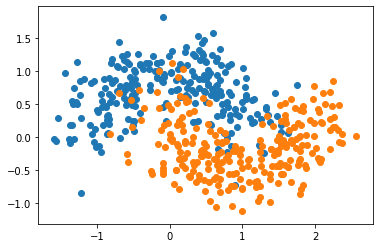

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## 2. sklearn 中的随机森林

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=666, oob_score=True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [7]:
rf_clf.oob_score_

0.9013333333333333

In [8]:
# max_leaf_nodes: 每一颗决策时有多少叶子节点
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, oob_score=True)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [9]:
rf_clf2.oob_score_

0.9066666666666666

## 3. Extra-Trees
- (及其随机的森林)：决策树在节点划分上，使用随机的特征和随机的阈值
- 使子决策树有更强的差异性，抑制了过拟合，一定程度上增加了偏差
- 更少的训练时间

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, random_state=666, oob_score=True)

In [12]:
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=True, random_state=666, verbose=0,
                     warm_start=False)

In [13]:
et_clf.oob_score_

0.8906666666666667

## 4. 集成学习解决回归问题

In [ ]:
# 以下回归训练器使用方式都和分类训练器一样
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor